# 경진대회 Fashion_MNIST

In [1]:
import numpy as np
import tensorflow as tf
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터전처리

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_class_train), (X_test, Y_class_test) = fashion_mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [3]:
#reshape & 정규화
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [4]:
#원핫인코딩
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### 1차(0.9233)CNN모델 정의, 설정, 학습

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import os
MODEL_DIR = './model/' 
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [8]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4719104   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [9]:
# 모델실행환경 & 저장조건 & 최적화 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [10]:
# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=300, batch_size=200, verbose=0, 
                    callbacks=[early_stopping, checkpointer])


Epoch 00001: val_loss improved from inf to 0.31591, saving model to ./model/best001-0.3159.hdf5

Epoch 00002: val_loss improved from 0.31591 to 0.26995, saving model to ./model/best002-0.2699.hdf5

Epoch 00003: val_loss improved from 0.26995 to 0.24341, saving model to ./model/best003-0.2434.hdf5

Epoch 00004: val_loss improved from 0.24341 to 0.23126, saving model to ./model/best004-0.2313.hdf5

Epoch 00005: val_loss improved from 0.23126 to 0.22361, saving model to ./model/best005-0.2236.hdf5

Epoch 00006: val_loss improved from 0.22361 to 0.21239, saving model to ./model/best006-0.2124.hdf5

Epoch 00007: val_loss improved from 0.21239 to 0.20029, saving model to ./model/best007-0.2003.hdf5

Epoch 00008: val_loss did not improve from 0.20029

Epoch 00009: val_loss did not improve from 0.20029

Epoch 00010: val_loss did not improve from 0.20029

Epoch 00011: val_loss did not improve from 0.20029

Epoch 00012: val_loss did not improve from 0.20029

Epoch 00013: val_loss did not improv

In [11]:
from tensorflow.keras.models import load_model
model = load_model('./model/best007-0.2003.hdf5')

In [12]:
acc = model.evaluate(X_test, Y_test, verbose=2)[1]
print(f"Test Accuracy: {acc:.4f}")

313/313 - 1s - loss: 0.2146 - accuracy: 0.9233
Test Accuracy: 0.9233


### 훈련과정 시각화

In [13]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

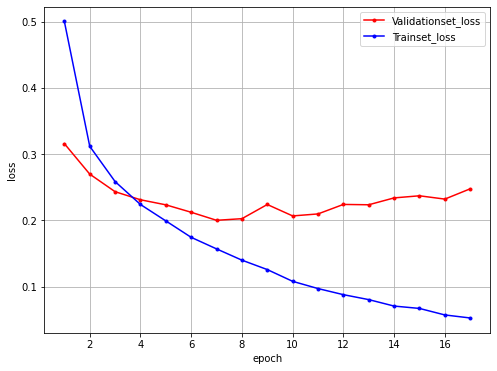

In [14]:
# 그래프로 표현
import matplotlib.pyplot as plt
%matplotlib inline
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 2차(0.9173)

In [11]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(64, kernel_size=(2, 2), input_shape=(28, 28, 1), activation='relu', padding='same'),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [12]:
# 모델실행환경 & 저장조건 & 최적화 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [13]:
# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=300, batch_size=200, verbose=0, 
                    callbacks=[early_stopping, checkpointer])


Epoch 00001: val_loss improved from inf to 0.45287, saving model to ./model/best001-0.4529.hdf5

Epoch 00002: val_loss improved from 0.45287 to 0.38222, saving model to ./model/best002-0.3822.hdf5

Epoch 00003: val_loss improved from 0.38222 to 0.34917, saving model to ./model/best003-0.3492.hdf5

Epoch 00004: val_loss improved from 0.34917 to 0.34396, saving model to ./model/best004-0.3440.hdf5

Epoch 00005: val_loss improved from 0.34396 to 0.32512, saving model to ./model/best005-0.3251.hdf5

Epoch 00006: val_loss improved from 0.32512 to 0.31752, saving model to ./model/best006-0.3175.hdf5

Epoch 00007: val_loss improved from 0.31752 to 0.30388, saving model to ./model/best007-0.3039.hdf5

Epoch 00008: val_loss improved from 0.30388 to 0.30191, saving model to ./model/best008-0.3019.hdf5

Epoch 00009: val_loss improved from 0.30191 to 0.30160, saving model to ./model/best009-0.3016.hdf5

Epoch 00010: val_loss improved from 0.30160 to 0.29033, saving model to ./model/best010-0.2903

In [14]:
from tensorflow.keras.models import load_model
model = load_model('./model/best072-0.2235.hdf5')

In [15]:
acc = model.evaluate(X_test, Y_test, verbose=2)[1]
print(f"Test Accuracy: {acc:.4f}")

313/313 - 1s - loss: 0.2364 - accuracy: 0.9173
Test Accuracy: 0.9173


### 3차(0.9275)

In [16]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(64, kernel_size=(2, 2), input_shape=(28, 28, 1), activation='relu', padding='same'),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)             

In [17]:
# 모델실행환경 & 저장조건 & 최적화 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=300, batch_size=200, verbose=0, 
                    callbacks=[early_stopping, checkpointer])


Epoch 00001: val_loss improved from inf to 0.41114, saving model to ./model/best001-0.4111.hdf5

Epoch 00002: val_loss improved from 0.41114 to 0.35054, saving model to ./model/best002-0.3505.hdf5

Epoch 00003: val_loss improved from 0.35054 to 0.30626, saving model to ./model/best003-0.3063.hdf5

Epoch 00004: val_loss improved from 0.30626 to 0.28844, saving model to ./model/best004-0.2884.hdf5

Epoch 00005: val_loss improved from 0.28844 to 0.28615, saving model to ./model/best005-0.2862.hdf5

Epoch 00006: val_loss improved from 0.28615 to 0.25876, saving model to ./model/best006-0.2588.hdf5

Epoch 00007: val_loss improved from 0.25876 to 0.25367, saving model to ./model/best007-0.2537.hdf5

Epoch 00008: val_loss improved from 0.25367 to 0.24415, saving model to ./model/best008-0.2442.hdf5

Epoch 00009: val_loss did not improve from 0.24415

Epoch 00010: val_loss improved from 0.24415 to 0.22752, saving model to ./model/best010-0.2275.hdf5

Epoch 00011: val_loss improved from 0.2275

In [19]:
from tensorflow.keras.models import load_model
model = load_model('./model/best030-0.1980.hdf5')

In [20]:
acc = model.evaluate(X_test, Y_test, verbose=2)[1]
print(f"Test Accuracy: {acc:.4f}")

313/313 - 1s - loss: 0.2139 - accuracy: 0.9275
Test Accuracy: 0.9275


### 4차(0.9274)

In [21]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(64, kernel_size=(2, 2), input_shape=(28, 28, 1), activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, padding='same'),
    Dropout(0.3),
    Conv2D(64, (2, 2), activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, padding='same'),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)             

In [22]:
# 모델실행환경 & 저장조건 & 최적화 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [23]:
# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=300, batch_size=200, verbose=0, 
                    callbacks=[early_stopping, checkpointer])


Epoch 00001: val_loss improved from inf to 0.42212, saving model to ./model/best001-0.4221.hdf5

Epoch 00002: val_loss improved from 0.42212 to 0.35078, saving model to ./model/best002-0.3508.hdf5

Epoch 00003: val_loss improved from 0.35078 to 0.31600, saving model to ./model/best003-0.3160.hdf5

Epoch 00004: val_loss improved from 0.31600 to 0.30196, saving model to ./model/best004-0.3020.hdf5

Epoch 00005: val_loss improved from 0.30196 to 0.30077, saving model to ./model/best005-0.3008.hdf5

Epoch 00006: val_loss improved from 0.30077 to 0.27639, saving model to ./model/best006-0.2764.hdf5

Epoch 00007: val_loss improved from 0.27639 to 0.26372, saving model to ./model/best007-0.2637.hdf5

Epoch 00008: val_loss improved from 0.26372 to 0.26127, saving model to ./model/best008-0.2613.hdf5

Epoch 00009: val_loss improved from 0.26127 to 0.25214, saving model to ./model/best009-0.2521.hdf5

Epoch 00010: val_loss improved from 0.25214 to 0.24401, saving model to ./model/best010-0.2440

In [24]:
from tensorflow.keras.models import load_model
model = load_model('./model/best035-0.2020.hdf5')

In [25]:
acc = model.evaluate(X_test, Y_test, verbose=2)[1]
print(f"Test Accuracy: {acc:.4f}")

313/313 - 1s - loss: 0.2175 - accuracy: 0.9274
Test Accuracy: 0.9274


### 5차(0.9088)

In [86]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(128, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu', padding='same', strides=2),
    MaxPooling2D(pool_size=2, strides=2, padding='same'),
    Dropout(0.5),
    Conv2D(512, (4, 4), activation='relu', strides=3, padding='same'),
    MaxPooling2D(pool_size=2, padding='same'),
    Dropout(0.25),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, padding='same'),
    Dropout(0.3),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=2, padding='same'),
    Dropout(0.3),
    Flatten(),
    Dense(684, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 14, 14, 128)       3328      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 3, 3, 512)         1049088   
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 2, 2, 512)         0         
_________________________________________________________________
dropout_63 (Dropout)         (None, 2, 2, 512)         0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 2, 2, 32)        

In [87]:
# 모델실행환경 & 저장조건 & 최적화 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [88]:
# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=300, batch_size=200, verbose=0, 
                    callbacks=[early_stopping, checkpointer])


Epoch 00001: val_loss improved from inf to 0.48476, saving model to ./model/best001-0.4848.hdf5

Epoch 00002: val_loss improved from 0.48476 to 0.38221, saving model to ./model/best002-0.3822.hdf5

Epoch 00003: val_loss improved from 0.38221 to 0.34046, saving model to ./model/best003-0.3405.hdf5

Epoch 00004: val_loss improved from 0.34046 to 0.33725, saving model to ./model/best004-0.3373.hdf5

Epoch 00005: val_loss improved from 0.33725 to 0.30585, saving model to ./model/best005-0.3058.hdf5

Epoch 00006: val_loss improved from 0.30585 to 0.29289, saving model to ./model/best006-0.2929.hdf5

Epoch 00007: val_loss improved from 0.29289 to 0.28530, saving model to ./model/best007-0.2853.hdf5

Epoch 00008: val_loss did not improve from 0.28530

Epoch 00009: val_loss improved from 0.28530 to 0.27533, saving model to ./model/best009-0.2753.hdf5

Epoch 00010: val_loss improved from 0.27533 to 0.26673, saving model to ./model/best010-0.2667.hdf5

Epoch 00011: val_loss did not improve from

In [89]:
from tensorflow.keras.models import load_model
model = load_model('./model/best031-0.2314.hdf5')

In [90]:
acc = model.evaluate(X_test, Y_test, verbose=2)[1]
print(f"Test Accuracy: {acc:.4f}")

313/313 - 1s - loss: 0.2613 - accuracy: 0.9088
Test Accuracy: 0.9088
